In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# PART -1-
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [ ]:
training_set = dataset_train.iloc[:,1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [20]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
# creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train) 

In [22]:
# reshaping
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))

In [ ]:
# PART -2-
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [24]:
# Initialising the rnn 
regressor = Sequential()

In [25]:
# Adding the first lstm layer adn some dropout regulalrisation / stacked lstm layer
regressor.add(LSTM(units=50, return_sequences= True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second lstm layer adn some dropout regulalrisation / stacked lstm layer
regressor.add(LSTM(units=50, return_sequences= True))
regressor.add(Dropout(0.2))

# Adding a third lstm layer adn some dropout regulalrisation / stacked lstm layer
regressor.add(LSTM(units=50, return_sequences= True))
regressor.add(Dropout(0.2))

# Adding a fourth lstm layer adn some dropout regulalrisation / stacked lstm layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [26]:
# adding the output layer
regressor.add(Dense(units=1))

In [27]:
# compiling the rnn
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [28]:
# Fitting the rnn to the training set
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 14s 101ms/step - loss: 0.0369
Epoch 2/100
38/38 [==============================] - 4s 99ms/step - loss: 0.0059
Epoch 3/100
38/38 [==============================] - 4s 95ms/step - loss: 0.0057
Epoch 4/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0046
Epoch 6/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0047
Epoch 7/100
38/38 [==============================] - 4s 101ms/step - loss: 0.0043
Epoch 8/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0046
Epoch 9/100
38/38 [==============================] - 6s 148ms/step - loss: 0.0048
Epoch 10/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0041
Epoch 11/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0039
Epoch 12/100
38/38 [==============================] - 5s 118ms/step - loss: 0.0052
Epoch 13/100
3

In [29]:
# Getting the real stock price of 2017 
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [30]:
# getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [31]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test) 
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 1s/step


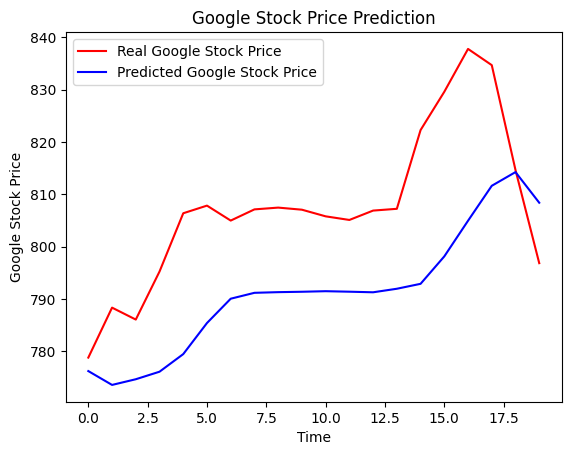

In [32]:
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()